In [48]:
import pandas as pd 
import numpy as np
import pylab
from scipy.stats import probplot,skew,chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt 

In [49]:
df=pd.read_csv('../Dataset/AI_Resume_Screening.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Resume_ID               1000 non-null   int64 
 1   Name                    1000 non-null   object
 2   Skills                  1000 non-null   object
 3   Experience (Years)      1000 non-null   int64 
 4   Education               1000 non-null   object
 5   Certifications          726 non-null    object
 6   Job Role                1000 non-null   object
 7   Recruiter Decision      1000 non-null   object
 8   Salary Expectation ($)  1000 non-null   int64 
 9   Projects Count          1000 non-null   int64 
 10  AI Score (0-100)        1000 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


# Null Values analysis

Here the certification feature contains null values

In [50]:
print("Number of null values:\n")
for feat in df.columns:
    print(f"{feat} Contains {df[feat].isna().sum()}")

Number of null values:

Resume_ID Contains 0
Name Contains 0
Skills Contains 0
Experience (Years) Contains 0
Education Contains 0
Certifications Contains 274
Job Role Contains 0
Recruiter Decision Contains 0
Salary Expectation ($) Contains 0
Projects Count Contains 0
AI Score (0-100) Contains 0


# Observing the unique values and number of unique values

In [51]:
for i in df.columns:
    if i in ['Resume_ID','Name','AI Score (0-100)']:
        continue 
    if len(df[i].unique())<20:
        print(f"{i}:")
        print(f"No of possible values:{len(df[i].unique())}")
        print(df[i].unique(),"\n")
    else:
        print(f"{i}:")
        print(f"No of possible values:{len(df[i].unique())}")
        print("\n")

Skills:
No of possible values:238


Experience (Years):
No of possible values:11
[10  1  7  4  3  0  5  6  8  9  2] 

Education:
No of possible values:5
['B.Sc' 'MBA' 'B.Tech' 'PhD' 'M.Tech'] 

Certifications:
No of possible values:4
[nan 'Google ML' 'Deep Learning Specialization' 'AWS Certified'] 

Job Role:
No of possible values:4
['AI Researcher' 'Data Scientist' 'Cybersecurity Analyst'
 'Software Engineer'] 

Recruiter Decision:
No of possible values:2
['Hire' 'Reject'] 

Salary Expectation ($):
No of possible values:993


Projects Count:
No of possible values:11
[ 8  1  7  0  9  5  3 10  6  2  4] 



# Categorical vs Numerical Data

In [52]:
columns=df.columns
categorical_features=[]
numerical_features=[]
for i in columns:
    if i=='Resume_ID':
        continue
    if df[i].dtype=='str' or df[i].dtype=='object':
        categorical_features.append(i)
    else:
        numerical_features.append(i)
print('Categorical features:',",".join(categorical_features))
print('Numerical features:',",".join(numerical_features),end="\n")

Categorical features: Name,Skills,Education,Certifications,Job Role,Recruiter Decision
Numerical features: Experience (Years),Salary Expectation ($),Projects Count,AI Score (0-100)


# Checking the Distribution

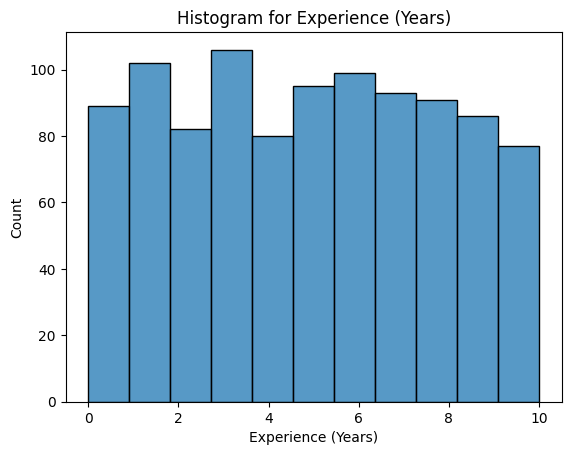

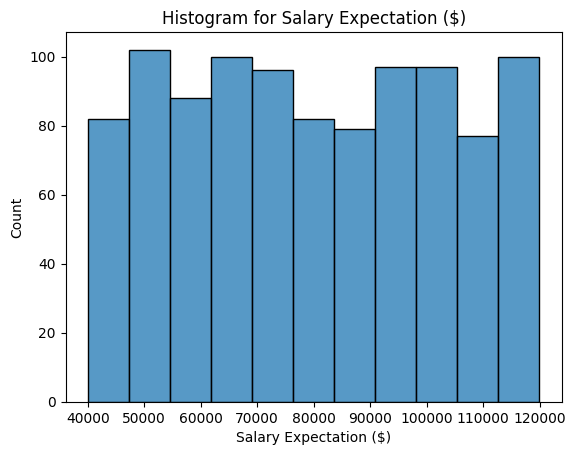

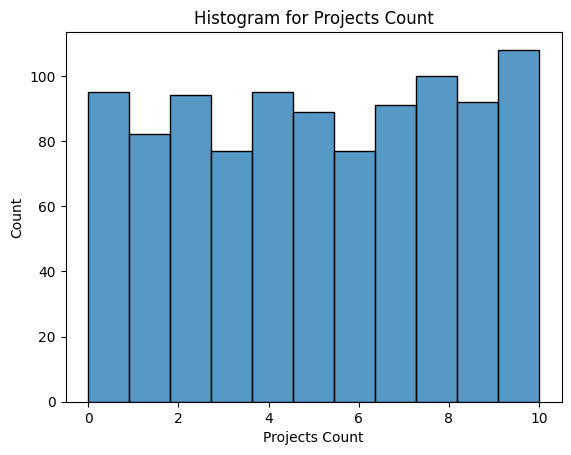

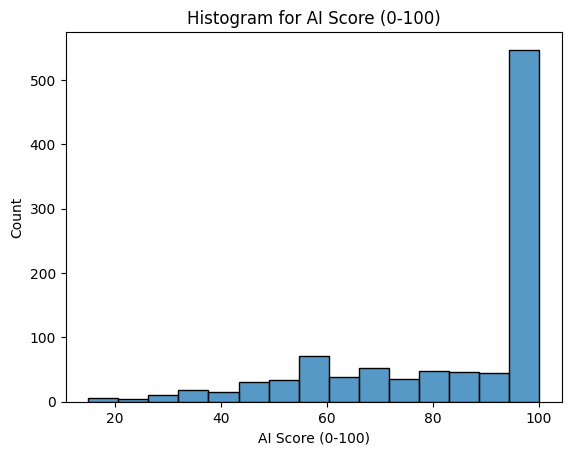

In [53]:
for feat in numerical_features:
    sns.histplot(df[feat].sort_values())
    plt.title(f'Histogram for {feat}')
    plt.show()

# Outlier Detection

Here AI score seems to contain outliers

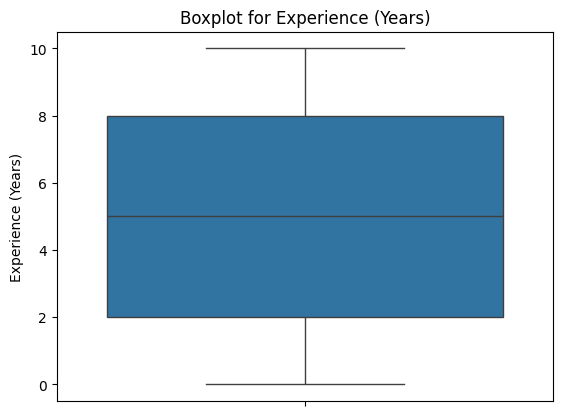

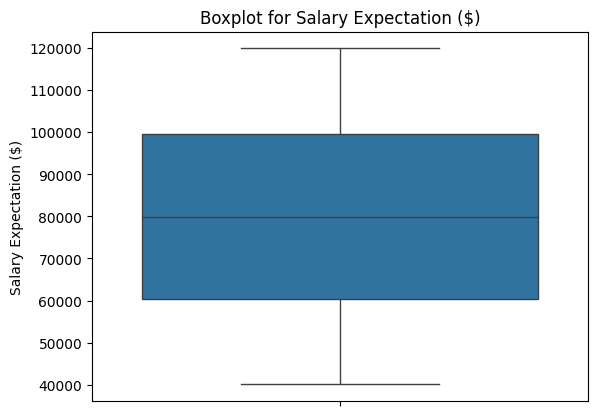

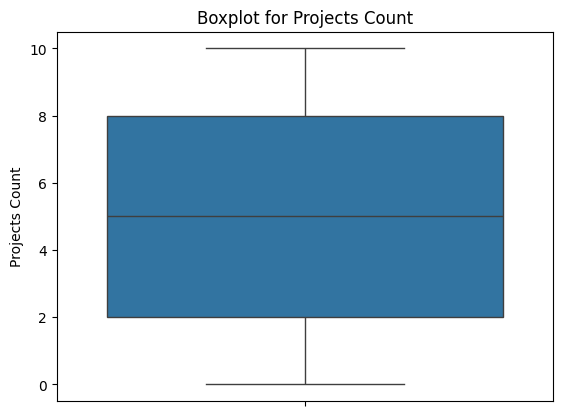

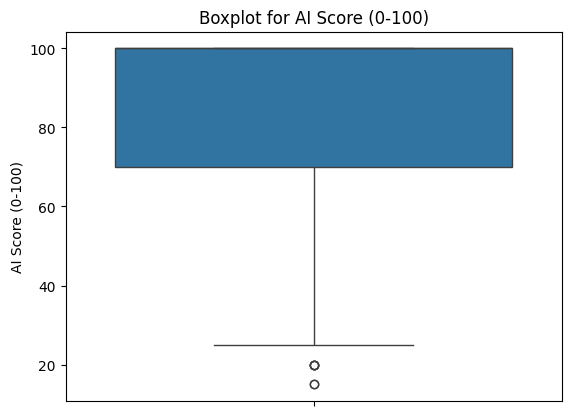

In [54]:
for feat in numerical_features:
    sns.boxplot(df[feat])
    plt.title(f"Boxplot for {feat}")
    plt.show()

# Skewness in the data

Here AI Score,Project Count and Experience (Years) are discrete 

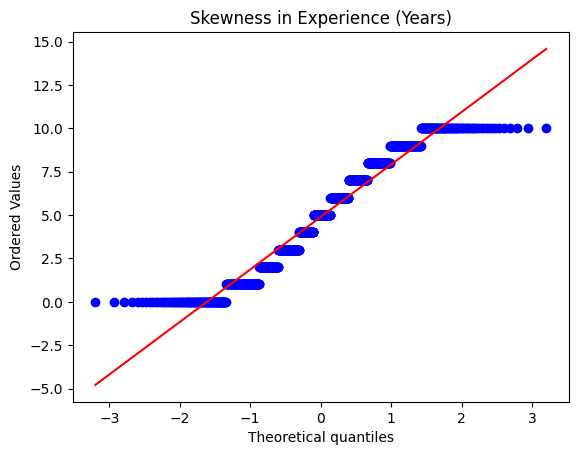

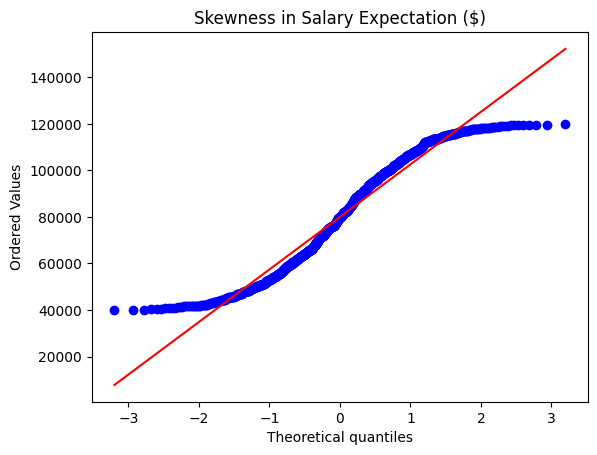

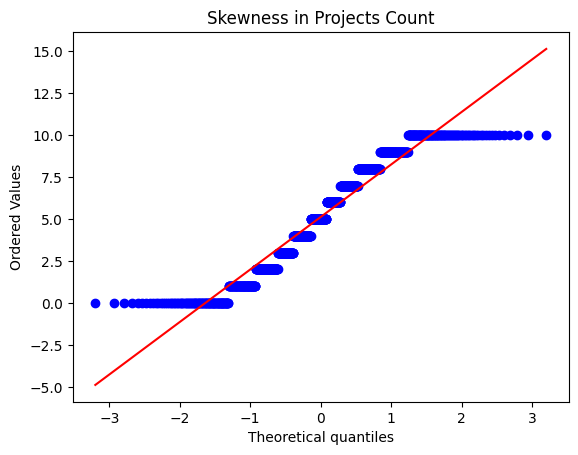

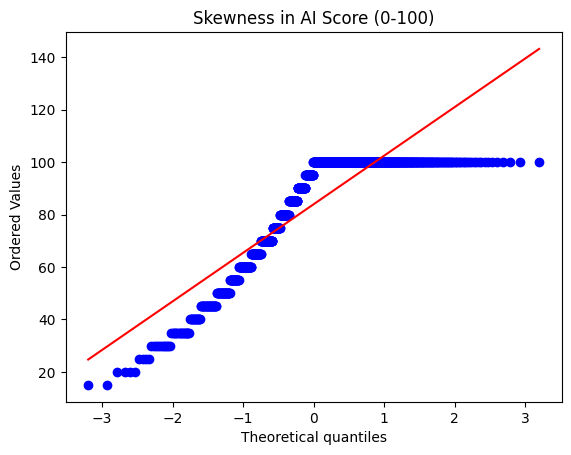

Skewness measure:

Experience (Years): 0.02175220324531056


Salary Expectation ($): 0.016292273324632206


Projects Count: -0.048780587412767154


AI Score (0-100): -1.1106920072478381
Negatively Skewed




In [55]:
for feature in numerical_features:
    probplot(df[feature],dist='norm',plot=pylab)
    plt.title(f'Skewness in {feature}')
    plt.show()

print("Skewness measure:\n")
for feature in numerical_features:
    skewness=skew(df[feature])
    print(f"{feature}: {skewness}")
    if skewness<-0.2:
        print("Negatively Skewed")
    elif skewness>0.2:
        print("Positively Skewed")
    print("\n")

# Analysis of Skills

In [56]:
df['Skills'].unique()

array(['TensorFlow, NLP, Pytorch',
       'Deep Learning, Machine Learning, Python, SQL',
       'Ethical Hacking, Cybersecurity, Linux',
       'Python, Pytorch, TensorFlow', 'SQL, React, Java',
       'Cybersecurity, Networking, Linux, Ethical Hacking',
       'Networking, Cybersecurity, Ethical Hacking',
       'TensorFlow, Pytorch, NLP', 'Networking, Ethical Hacking',
       'Python, TensorFlow, Pytorch, NLP', 'SQL, Java, C++',
       'Cybersecurity, Ethical Hacking, Networking',
       'Cybersecurity, Networking', 'SQL, C++, Java', 'Pytorch, NLP',
       'SQL, Python', 'Linux, Networking, Cybersecurity, Ethical Hacking',
       'SQL, Python, Deep Learning', 'Machine Learning, SQL, Python',
       'SQL, Java, C++, React', 'Machine Learning, Deep Learning, SQL',
       'TensorFlow, Pytorch, NLP, Python',
       'Pytorch, TensorFlow, NLP, Python', 'Python, NLP',
       'Ethical Hacking, Cybersecurity', 'NLP, Pytorch, Python',
       'Python, SQL', 'Ethical Hacking, Networking, Linux'

In [57]:
from collections import Counter
listofskills=[]
for i in df['Skills'].unique():
    listofskills=listofskills+[skill.replace(',',' ') for skill in i.split(",")]
skills=Counter(listofskills)

unique_skills=",".join(list(skills.keys()))
print(f'Unique skills:{unique_skills}\n')
for skill,count in zip(skills.keys(),skills.values()):
    print(f"{skill} has {count} occurences") 

Unique skills:TensorFlow, NLP, Pytorch,Deep Learning, Machine Learning, Python, SQL,Ethical Hacking, Cybersecurity, Linux,Python, TensorFlow,SQL, React, Java,Cybersecurity, Networking, Ethical Hacking,Networking, C++,Pytorch,Linux, Deep Learning,Machine Learning,NLP,C++,React,Java

TensorFlow has 15 occurences
 NLP has 33 occurences
 Pytorch has 33 occurences
Deep Learning has 15 occurences
 Machine Learning has 33 occurences
 Python has 65 occurences
 SQL has 64 occurences
Ethical Hacking has 15 occurences
 Cybersecurity has 33 occurences
 Linux has 33 occurences
Python has 30 occurences
 TensorFlow has 33 occurences
SQL has 30 occurences
 React has 33 occurences
 Java has 33 occurences
Cybersecurity has 15 occurences
 Networking has 33 occurences
 Ethical Hacking has 33 occurences
Networking has 15 occurences
 C++ has 32 occurences
Pytorch has 15 occurences
Linux has 15 occurences
 Deep Learning has 32 occurences
Machine Learning has 14 occurences
NLP has 15 occurences
C++ has 15 occ

# Analysis of Experience (Years)

Maximum number of Experience: 10 years
Mean number of Experience: 4.896 years
Minimum number of Experience: 0 years



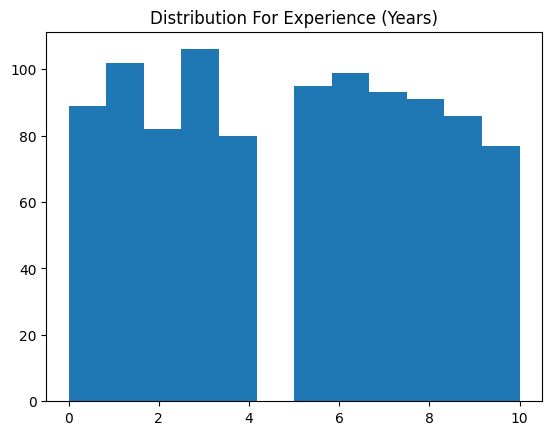

In [58]:
print(f"Maximum number of Experience: {df['Experience (Years)'].max()} years")
print(f"Mean number of Experience: {df['Experience (Years)'].mean()} years")
print(f"Minimum number of Experience: {df['Experience (Years)'].min()} years\n")

plt.hist(df['Experience (Years)'],bins=12)
plt.title('Distribution For Experience (Years)')
plt.show()

# Analysis of Recruiter Decision

In [59]:
print(df['Recruiter Decision'].value_counts(dropna=False))
print("\nMinimum AI Score with which a candidate has been hired:", df.loc[df['Recruiter Decision']=='Hire','AI Score (0-100)'].min())
print("Maximum AI Score with which a candidate has been rejected:",df.loc[df['Recruiter Decision']=='Reject','AI Score (0-100)'].max())


Recruiter Decision
Hire      812
Reject    188
Name: count, dtype: int64

Minimum AI Score with which a candidate has been hired: 65
Maximum AI Score with which a candidate has been rejected: 60


# Correlation Analysis for Recruiter's Decision (Using Pearson's correlation) 

In [60]:
df1=df.copy()
df1['Recruiter Decision']=df1['Recruiter Decision'].map({'Hire':1,'Reject':0})
needed_features=numerical_features+['Recruiter Decision']
correlation=df1[needed_features].corr()
correlation_matrix=pd.DataFrame(correlation['Recruiter Decision'].sort_values(ascending=False))
correlation_matrix

,Recruiter Decision
Recruiter Decision,1.000000
AI Score (0-100),0.840543
Experience (Years),0.576235
Projects Count,0.331249
Salary Expectation ($),0.044073


# Correlation Analysis for AI Score feature (Using Pearson's correlation) 

In [61]:
correlation=df[numerical_features].corr()
correlation_df=pd.DataFrame(correlation['AI Score (0-100)']).sort_values(by='AI Score (0-100)',ascending=False)
correlation_df

,AI Score (0-100)
AI Score (0-100),1.000000
Experience (Years),0.777042
Projects Count,0.358666
Salary Expectation ($),0.033354


# Correlation Analysis for AI Score (Using Spearman's rank Correlation)

In [62]:
correlation=df[numerical_features].corr(method='spearman')
correlation_df=pd.DataFrame(correlation['AI Score (0-100)']).sort_values(by='AI Score (0-100)',ascending=False)
correlation_df

,AI Score (0-100)
AI Score (0-100),1.000000
Experience (Years),0.821965
Projects Count,0.333386
Salary Expectation ($),0.031096


# Chi Square Test 

In [63]:
from scipy.stats import chi2_contingency, f_oneway

def chi_square_test(df, categorical_target, categorical_feature):
    contingency_table = pd.crosstab(df[categorical_target], df[categorical_feature])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return p

dependent_cat_features=[]
print("P values:")
for i in categorical_features:
    p_value=chi_square_test(df,'Recruiter Decision',i)
    if p_value<0.05:
        dependent_cat_features.append(i)
    print(i,chi_square_test(df,'Recruiter Decision',i))

print("\nTarget feature is dependent on these features:",dependent_cat_features)

P values:
Name 0.45506425076751417
Skills 0.469518356357171
Education 0.8117283379087459
Certifications 0.8106512545591001
Job Role 0.6241252746010506
Recruiter Decision 4.740449806558393e-218

Target feature is dependent on these features: ['Recruiter Decision']


# Mutual Info Analysis for AI Score

In [64]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import re

df1=df.copy()
vectorizer=TfidfVectorizer(lowercase=True)

for feat in categorical_features:
    if feat!='Skills':
        le=LabelEncoder()
        df1[feat]=le.fit_transform(df1[feat])

In [65]:
processed_texts=[]
for text in df1['Skills']:
    processed_text=re.sub(r'[^a-zA-z]'," ",text)
    processed_texts.append(processed_text)

df1['Skills']=processed_text
vectorized_skills=vectorizer.fit_transform(df1['Skills'])
df_final=pd.DataFrame(vectorized_skills.toarray(),columns=vectorizer.get_feature_names_out())

#PCA 
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(df_final)
var=pca.explained_variance_ratio_
var=pd.DataFrame(var)
print(var.sort_values(ascending=False,by=0))

pca1=PCA(n_components=1)
df_final=pca1.fit_transform(df_final)
df_final=pd.DataFrame(df_final,columns=['Skills_Vectorized'])

     0
0  1.0
1  0.0
2  0.0
3  0.0
4  0.0


In [66]:
df1.drop(columns=['Skills'],inplace=True)
df1=pd.concat([df_final,df1],axis=1)
    
x=df1.drop(columns=['AI Score (0-100)','Resume_ID'])
y=df1['AI Score (0-100)']
mutual_info_AI_score=mutual_info_classif(x,y)

mutual_info_df_AI_score=pd.DataFrame({'Features':x.columns,'Mutual Info score':mutual_info_AI_score}).sort_values(by='Mutual Info score',ascending=False)
print('For AI Score:\n')
print(mutual_info_df_AI_score)

For AI Score:

                 Features  Mutual Info score
2      Experience (Years)           0.567060
6      Recruiter Decision           0.531933
8          Projects Count           0.138289
5                Job Role           0.008106
4          Certifications           0.004429
1                    Name           0.003629
0       Skills_Vectorized           0.003543
3               Education           0.000000
7  Salary Expectation ($)           0.000000


# Mutual Info for Recruiter Decision

In [67]:
df2=df.copy()
for feat in categorical_features:
    if feat=='Recruiter Decision' or feat=='Skills':
        continue
    le=LabelEncoder()
    df2[feat]=le.fit_transform(df2[feat])

In [68]:
processed_texts=[]
for text in df2['Skills']:
    processed_text=re.sub(r'[^a-zA-z]'," ",text)
    processed_texts.append(processed_text)
    
df2['Skills']=processed_text
vectorized_skills=vectorizer.fit_transform(df2['Skills'])
df_final=pd.DataFrame(vectorized_skills.toarray(),columns=vectorizer.get_feature_names_out())

from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(df_final)
var=pca.explained_variance_ratio_
var=pd.DataFrame(var)
print(var.sort_values(ascending=False,by=0))

pca1=PCA(n_components=1)
df_final=pca1.fit_transform(df_final)
df_final=pd.DataFrame(df_final,columns=['Skills_Vectorized'])

     0
0  1.0
1  0.0
2  0.0
3  0.0
4  0.0


In [69]:
df2.drop(columns=['Skills'],inplace=True)
df2=pd.concat([df_final,df2],axis=1)

x=df2.drop(columns=['Recruiter Decision','Resume_ID'])
y=df2['Recruiter Decision']

mutual_info_recruiter_decision=mutual_info_classif(x,y)
mutual_info_recruiter_decision_df=pd.DataFrame({'Feature':x.columns,'Mutual Info score':mutual_info_recruiter_decision}).sort_values(by='Mutual Info score',ascending=False)
print('For Recruiter Decision:\n')
print(mutual_info_recruiter_decision_df)

For Recruiter Decision:

                  Feature  Mutual Info score
8        AI Score (0-100)           0.483810
2      Experience (Years)           0.226112
7          Projects Count           0.066967
6  Salary Expectation ($)           0.005247
4          Certifications           0.000351
0       Skills_Vectorized           0.000000
1                    Name           0.000000
3               Education           0.000000
5                Job Role           0.000000
